In [8]:
from glob import glob
path='../'
filename='AFEP2-02.fepout'
fepoutFiles = glob(path+filename)
temperature = 300
RT = 0.00198720650096 * temperature
print(f"Will process {len(fepoutFiles)} fepout files.")

Will process 1 fepout files.


# Import necessary libraries
SAFEP_parse.py contains all the functions and library calls necessary to run the notebook
# Required libraries:
- numpy
- pandas
- matplotlib
- alchemlyb (pip install git+https://github.com/alchemistry/alchemlyb)
- natsort (for sorting file names)
- glob (for unix-like file paths)



In [9]:
from SAFEP_parse import *
plt.rcParams['figure.dpi'] = 150

# Use the Multistate Bennett Acceptance Ratio estimator

In [10]:
u_nk = namd.extract_u_nk(fepoutFiles, temperature)
bar = BAR()
bar.fit(u_nk)

BAR()

# Extract key features from the MBAR fitting

In [11]:
l, l_mid, f, df, ddf, errors = get_MBAR(bar)
#print(df.cumsum() * RT) #in unit of KT
print("Overall free energy",df.cumsum() * RT) #in unit of kcal/mol

print("Errors", errors)

Overall free energy [ 0.67136573  1.45738125  2.32434483  3.30001268  4.36351336  5.38934636
  6.39975529  7.3455434   8.1525056   8.78179918  9.3632617   9.96406891
 10.59755078 11.22501573 11.85286186 12.4361655  13.04409097 13.64503608
 14.25001433 14.79993527]
Errors [0.         0.10463192 0.15648747 0.19370493 0.2197967  0.24404679
 0.26418581 0.2842285  0.30285715 0.32128726 0.33510329 0.34170229
 0.34727086 0.35241983 0.35675542 0.36137652 0.36592104 0.36971411
 0.37312546 0.37655835 0.37915457]


In [12]:
#Overall delta G_site
print(f'\u0394G*(site) = {np.round((df.cumsum()*RT)[-1], 3)}\u00B1{np.round(errors[-1], 3)} kcal/mol')

ΔG*(site) = 14.8±0.379 kcal/mol


# Plot the change in free energy based on MBAR estimates

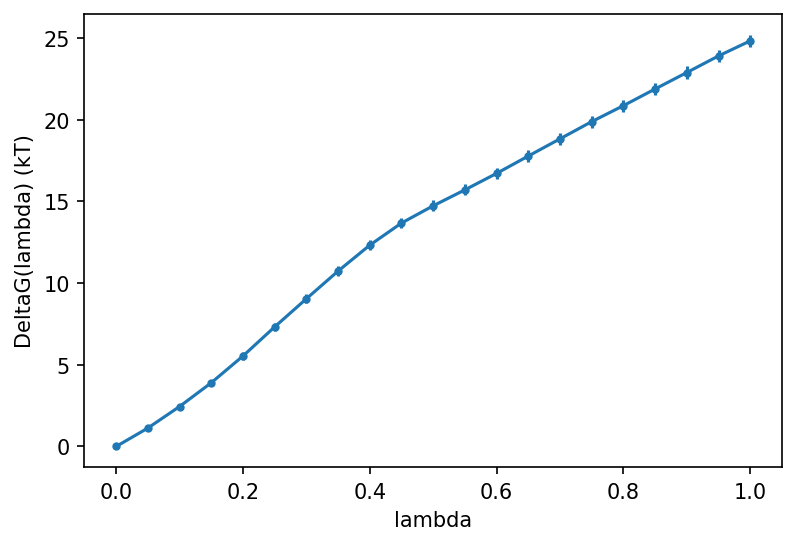

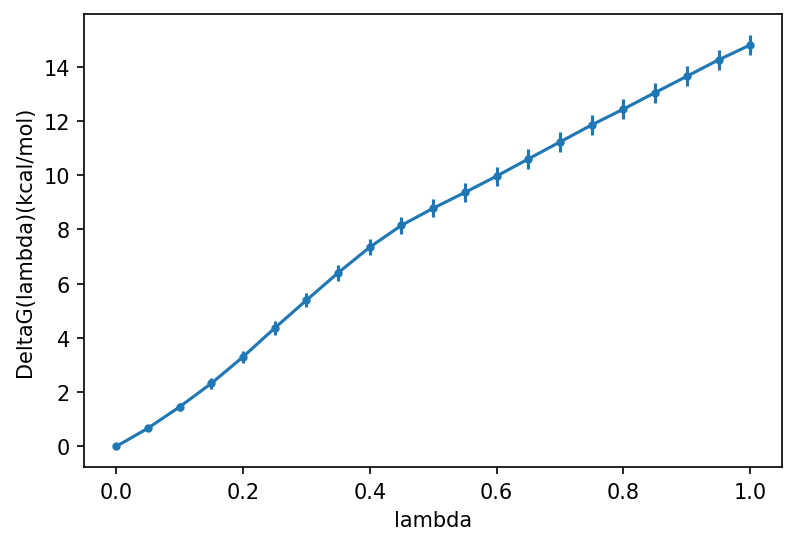

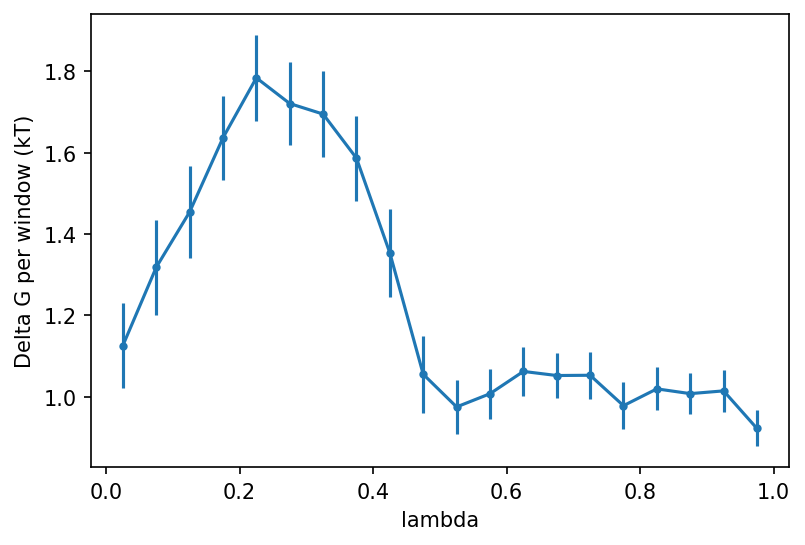

In [13]:
# Cumulative change in kT
plt.errorbar(l, f, yerr=errors, marker='.')
plt.xlabel('lambda')
plt.ylabel('DeltaG(lambda) (kT)')
plt.show()

# Cumulative change in kcal/mol
plt.errorbar(l, f * RT, yerr=errors, marker='.')
plt.xlabel('lambda')
plt.ylabel('DeltaG(lambda)(kcal/mol)')
plt.show()

# Per-window change in kT
plt.errorbar(l_mid, df, yerr=ddf, marker='.')
plt.xlabel('lambda')
plt.ylabel('Delta G per window (kT)')
plt.show()


# Plot the estimated total change in free energy as a function of simulation time; contiguous subsets starting at t=0 ("Forward") and t=end ("Reverse")

<AxesSubplot:xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kT)'>

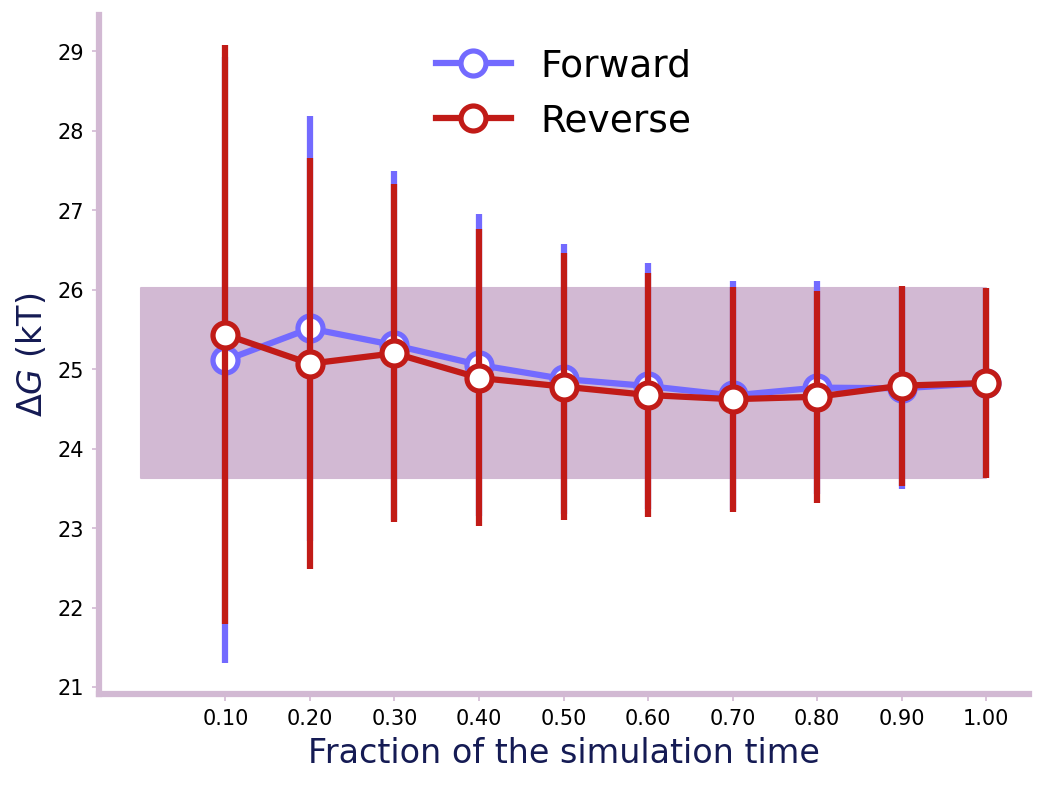

In [14]:
convergence_plot(u_nk, l)

# Use an exponential estimator to assess residual discrepancies and check for hysteresis

In [15]:
l, l_mid, dG_f, dG_b = get_EXP(u_nk)

Text(0, 0.5, 'Diff. in delta-G')

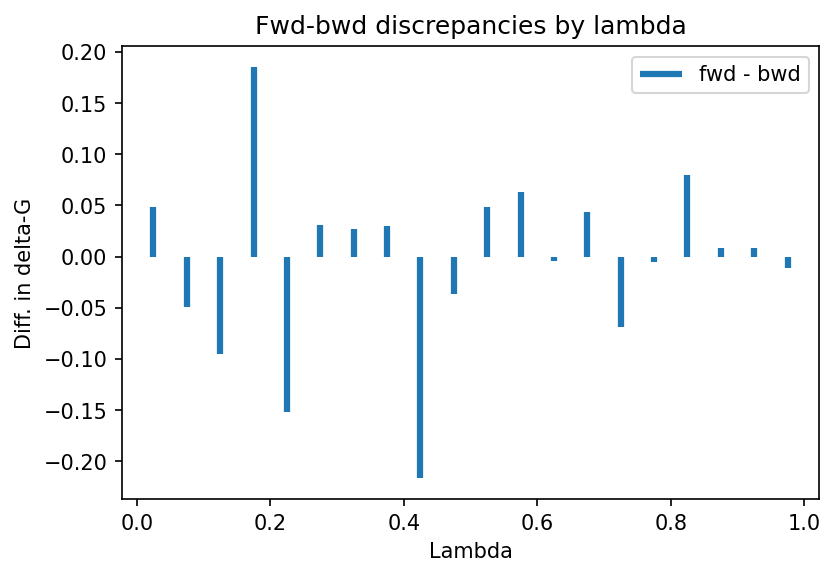

In [16]:
plt.vlines(l_mid, np.zeros(len(l_mid)), dG_f + np.array(dG_b), label="fwd - bwd", linewidth=3)

plt.legend()
plt.title('Fwd-bwd discrepancies by lambda')
plt.xlabel('Lambda')
plt.ylabel('Diff. in delta-G')

# The above data should follow a roughly normal distribution centered on 0.

Text(0, 0.5, 'Count')

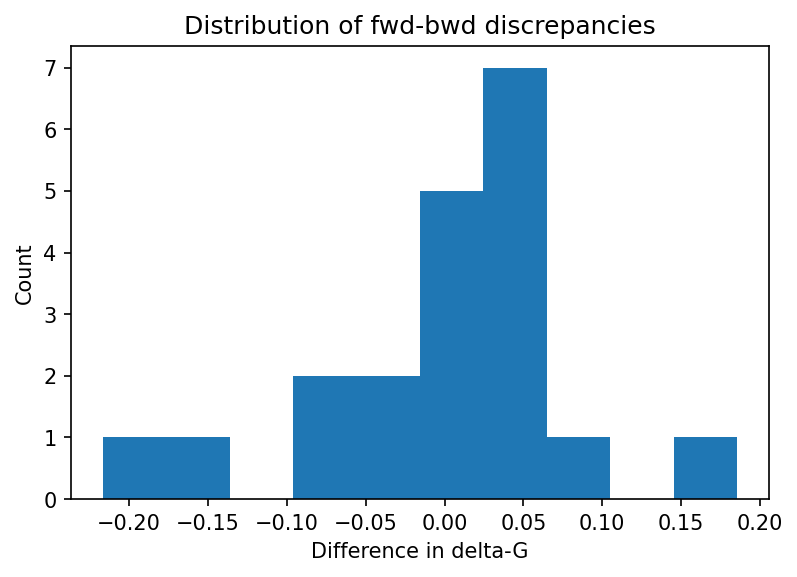

In [17]:
plt.hist(dG_f + np.array(dG_b));
plt.title('Distribution of fwd-bwd discrepancies')
plt.xlabel('Difference in delta-G')
plt.ylabel('Count')